In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/data-for-admission-in-the-university")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/data-for-admission-in-the-university


# Business Understanding

*   Business objectives

The objective is to understand and predict the factors that influence a student’s chance of admission to a university. This insight can help universities optimize admissions strategies and applicants better understand how their profiles affect admission outcomes.
Specifically:
1. Identify which variables (e.g., SAT, GPA, GRE, TOEFL, University rating) have the strongest impact.
2. Predict a student's likelihood of admission based on their profile.

*   Assess the situation

1. Resources: The dataset includes key academic metrics and admission outcomes

2. Constraints: \
    a. Limited number of features (might not capture other important factors like extracurriculars, essays). \
    b. Possible missing values or biases (e.g., dataset might be skewed towards particular types of students or universities).

3. Risks: \
    a. Misinterpretation: Correlation does not imply causation. \
    b. Overfitting if models are too complex relative to dataset size.

4. Assumptions: Data is accurate and representative of a general applicant pool.



*   Data science goals

1. Perform exploratory data analysis (EDA) to identify patterns, distributions, and relationships.

2. Build predictive models to estimate the probability of admission based on available features.

3. Evaluate model performance using appropriate metrics (e.g., RMSE for regression, R² score).



*   Project plan



1. Data Understanding - \
    a. Summarize and visualize the dataset. \
    b. Check for missing values, outliers, and data types.

2. Data Preparation - \
    a. Handle missing values if any. \
    b. Normalize or standardize features if necessary. \
    c. Create training and test datasets.

3. Modeling - \
    a. Train different models (linear regression, decision trees, etc.). \
    b. Tune hyperparameters for better performance.

4. Evaluation - \
    a. Assess models using appropriate evaluation metrics. \
    b. Compare model results to choose the best-performing one.

5. Deployment/Reporting - \
    a. Present findings and interpretations. \
    b. Share actionable insights (e.g., improving GPA or TOEFL might most strongly impact admission chances).

# Data Understanding

*   When was the data acquired?

We do not know the specific date of when the data was acquired but it was uploaded to Kaggle in 2021.

*   Where was the data acquired?

The team that performed the analysis in this report accessed the data used in the report via Kaggle.com. However, based on the description and typical context, it appears to be based on or inspired by the famous "Graduate Admissions" dataset from the University of California, Irvine (UCI) Machine Learning Repository.
That original dataset contains similar attributes (GRE, TOEFL, SOP, LOR, CGPA, Research, Chance of Admit) and is often used for machine learning projects.

*   How was the data acquired?

The data was sourced from Kaggle for this project but there is no information in Kaggle as to how the data was originally collected. \
Some potential sources could be - \
1. Public university admission records: Some universities publish anonymized admission statistics (scores, GPAs, etc.) online.

2. Surveys: The creator could have surveyed students who recently applied to graduate schools and self-reported their scores and admission chances.

3. Simulated data: Sometimes datasets are artificially created based on typical ranges and patterns seen in real admissions.

4. Research studies: Academic papers sometimes collect and share admissions-related datasets for analysis.

*   What are the attributes of the dataset?

The variables and their descriptions are as follows -
1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose (SOP) and Letter of Recommendation (LOR) Strength ( out of 5 )
5. Undergraduate GPA ( out of 10 )
6. Research Experience ( either 0 or 1 )
7. Chance of Admit ( ranging from 0 to 1 )

The code below gives us a comprehensive table describing the variables in the dataset and their respective descriptions

In [ ]:
import pandas as pd

# Define the variables and their descriptions
data = {
    'Variable': ['GRE Scores', 'TOEFL Scores', 'University Rating', 'Statement of purpose', 'Letter of recommendation', 'Undergraduate GPA', 'Research experience', 'Chance of admit'],
    'Description': [
        'Scores on the GRE exam out of 340',
        'Scores on the TOEFL exam out of 120',
        'A rating of the university out of 5',
        'Strength of the statement of purpose out of 5',
        'Strength of the letter of recommendation out of 5',
        'Undergraduate GPA out of 10',
        'Research experience (0 = no, 1 = yes)',
        'Chance of getting an admission (ranging from 0 to 1)'
    ]
}

# Create a DataFrame
df1 = pd.DataFrame(data)



# Apply styling for a formatted table
styled_df1 = df1.style.set_properties(**{
    'background-color': '#f5f5f5',
    'border': '2px solid black',
    'color': 'black',
    'text-align': 'left'  # Ensures table content is left-aligned
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'center')]},  # Center-align headers
    {'selector': 'td', 'props': [('padding', '10px'), ('text-align', 'left')]},  # Ensures content stays left-aligned
    {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center'), ('padding', '10px')]}
]).set_caption("Table 1 - Admission Data Variables and Descriptions")

styled_df1

,Variable,Description
0,GRE Scores,Scores on the GRE exam out of 340
1,TOEFL Scores,Scores on the TOEFL exam out of 120
2,University Rating,A rating of the university out of 5
3,Statement of purpose,Strength of the statement of purpose out of 5
4,Letter of recommendation,Strength of the letter of recommendation out of 5
5,Undergraduate GPA,Undergraduate GPA out of 10
6,Research experience,"Research experience (0 = no, 1 = yes)"
7,Chance of admit,Chance of getting an admission (ranging from 0 to 1)


**This how I have distributed each variable to different data type using the below definition -**
1. Nominal: Categories with no meaningful order

2. Ordinal: Categories with a meaningful order but unequal differences
3. Interval: Ordered, equal differences but no true zero

4. Ratio: Ordered, equal differences, and has a true zero

The code below adds another column to the previous table (Table 1 - Property Data Variables and Descriptions) which tells us the data type of each of the variables.

In [ ]:
import pandas as pd

# Define the variables and their descriptions
data = {
    'Variable': ['GRE Scores', 'TOEFL Scores', 'University Rating', 'Statement of purpose', 'Letter of recommendation', 'Undergraduate GPA', 'Research experience', 'Chance of admit'],
    'Description': [
        'Scores on the GRE exam out of 340',
        'Scores on the TOEFL exam out of 120',
        'A rating of the university out of 5',
        'Strength of the statement of purpose out of 5',
        'Strength of the letter of recommendation out of 5',
        'Undergraduate GPA out of 10',
        'Research experience (0 = no, 1 = yes)',
        'Chance of getting an admission (ranging from 0 to 1)'
    ],
    'Data Type': ['Ratio', 'Ratio', 'Ordinal', 'Ordinal', 'Ordinal', 'Ratio', 'Nominal', 'Ratio']
}

# Create a DataFrame
df2 = pd.DataFrame(data)



# Apply styling for a formatted table
styled_df2 = df2.style.set_properties(**{
    'background-color': '#f5f5f5',
    'border': '2px solid black',
    'color': 'black',
    'text-align': 'left'  # Ensures table content is left-aligned
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'center')]},  # Center-align headers
    {'selector': 'td', 'props': [('padding', '10px'), ('text-align', 'left')]},  # Ensures content stays left-aligned
    {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center'), ('padding', '10px')]}
]).set_caption("Table 2 - Admission Data Variables, Descriptions and Data types")

styled_df2

,Variable,Description,Data Type
0,GRE Scores,Scores on the GRE exam out of 340,Ratio
1,TOEFL Scores,Scores on the TOEFL exam out of 120,Ratio
2,University Rating,A rating of the university out of 5,Ordinal
3,Statement of purpose,Strength of the statement of purpose out of 5,Ordinal
4,Letter of recommendation,Strength of the letter of recommendation out of 5,Ordinal
5,Undergraduate GPA,Undergraduate GPA out of 10,Ratio
6,Research experience,"Research experience (0 = no, 1 = yes)",Nominal
7,Chance of admit,Chance of getting an admission (ranging from 0 to 1),Ratio


# Data Preparation


### Initial knowledge about the dataset

The code below gives us the names of our columns in the dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/adm_data.csv')
list(df.columns)

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

The column 'Serial No.' is not required so we can drop it, we do that by using this code below

In [ ]:
df.drop('Serial No.', axis=1, inplace=True)
list(df.columns)

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

The code below gives us the names of our columns, the number of values (count) in those columns and the data type in those columns.

In [ ]:
# Extract column information
df_info = pd.DataFrame({
    'Column Name': df.columns,
    'Non-Null Count': df.count().values,
    'Data Type': df.dtypes.values
})

# Format as a styled table
styled_df_info = df_info.style.set_properties(**{
    'background-color': '#f5f5f5',
    'border': '1px solid black',
    'color': 'black',
    'text-align': 'left'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#1E90FF'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'center')]},  # Center-align headers
    {'selector': 'td', 'props': [('padding', '10px'), ('text-align', 'left')]},  # Left-align content
    {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center'), ('padding', '10px')]}
]).set_caption("Table 3 - Dataset Column Information")

# Display the styled table
styled_df_info

,Column Name,Non-Null Count,Data Type
0,GRE Score,400,int64
1,TOEFL Score,400,int64
2,University Rating,400,int64
3,SOP,400,float64
4,LOR,400,float64
5,CGPA,400,float64
6,Research,400,int64
7,Chance of Admit,400,float64


The code below checks if there are any null or empty values in our dataset. If there are, we can drop those values using the code df.dropna(). This drops all the values and rows which have null values.

Dropping null values (or handling them appropriately) is crucial in data analysis for several reasons:

1. Ensures Accuracy - Missing values can distort statistical calculations, such as mean, median, or correlations.They can lead to incorrect conclusions if not handled properly.

2. Prevents Errors in Computations - Many machine learning models and statistical functions do not work with null values.Some algorithms will fail or produce incorrect results if they encounter missing data.

3. Enhances Data Visualization - Charts and graphs may not render correctly if they contain null values. Dropping or filling missing values ensures that visual representations are meaningful.

In [ ]:
df.isnull().sum() #tells us if there are any null or empty values in any column

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


Since we do not have any null values, further cleaning is not required

### Summary statistics of our data

The code below gives us a comprehensive summary of those columns of our data which contain data types of int64. This is because the code gives us the count, mean, standard deviation, minimum, maximum and the inner-quartiles of the data which can only be performed on integer values.

In [ ]:
df_summary = df.describe().reset_index().rename(columns={'index': 'Statistic'})

# Format as a styled table
styled_df_summary = df_summary.style.set_properties(**{
    'background-color': '#f5f5f5',
    'border': '1px solid black',
    'color': 'black',
    'text-align': 'left'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#DC143C'), ('color', 'white'), ('font-weight', 'bold'), ('text-align', 'center')]},  # Crimson Header
    {'selector': 'td', 'props': [('padding', '10px'), ('text-align', 'left')]},
    {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center'), ('padding', '10px')]}
]).set_caption("Table 4 - Descriptive Statistics of Dataset")

# Display the styled table
styled_df_summary

,Statistic,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
1,mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
2,std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
3,min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
4,25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
5,50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
6,75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
7,max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Visualizations

The code below gives us a scatterplot comparing the GRE Score and the TOEFL Score based on university rating. We hypothesize that a higher university rating will require higher GRE and TOEFL scores.

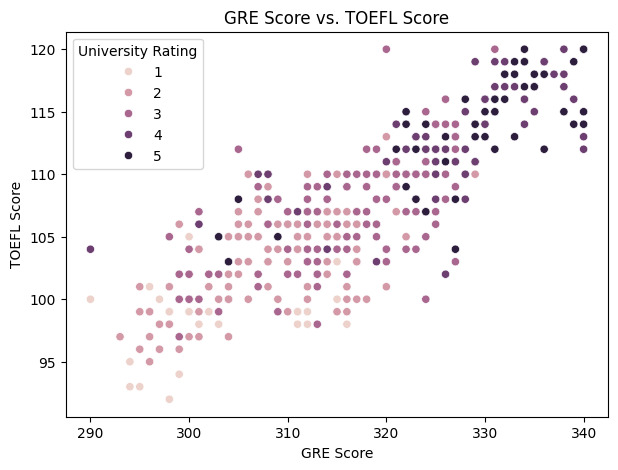

In [ ]:
#Scatterplot based on university rating- comparing GRE score and TOEFL

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the scatterplot (update column names if necessary)
plt.figure(figsize=(7, 5))
sns.scatterplot(x='GRE Score', y='TOEFL Score', data=df, hue= 'University Rating')
plt.title('GRE Score vs. TOEFL Score')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.show()


Next we show a correlation heatmap to see which variables are highly correlated with each other

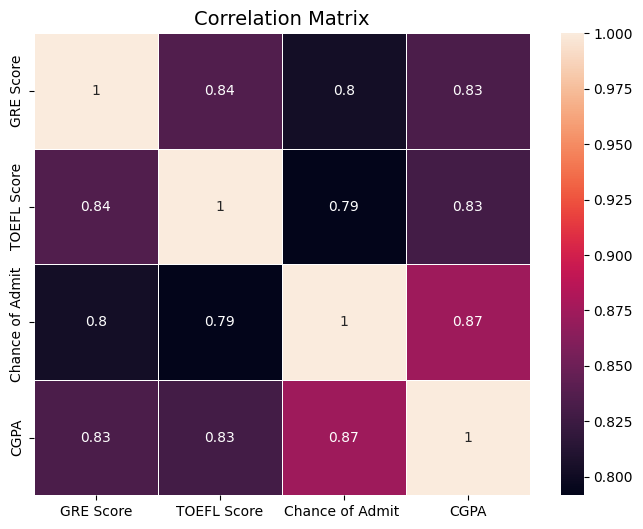

In [ ]:
#Correlation heatmap matrix

columns_corr = ['GRE Score', 'TOEFL Score', 'Chance of Admit ', 'CGPA']
correlation_matrix = df[columns_corr].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

We also show some bar graphs just to see how our entire data is structured and which areas have the highest number of data points

Text(0.5, 1.0, 'Count of University Rating')

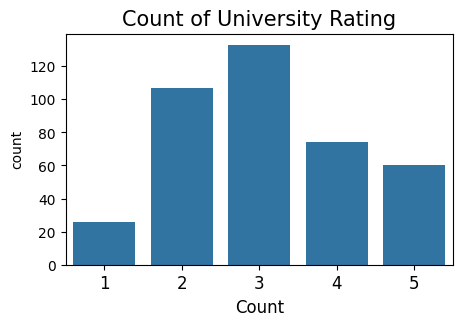

In [ ]:
plt.figure(figsize=(5,3),dpi=100)
sns.countplot(x='University Rating',data=df)
plt.xticks(rotation=0, fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.title('Count of University Rating', fontsize=15)

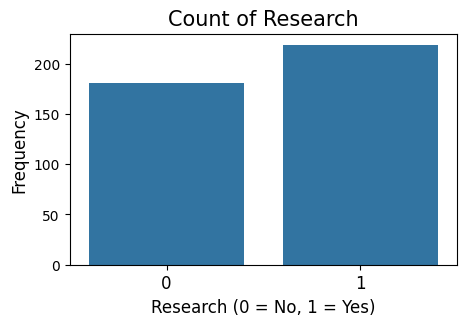

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Research', data=df)
plt.xticks(rotation=0, fontsize=12)
plt.title('Count of Research', fontsize=15)
plt.xlabel('Research (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

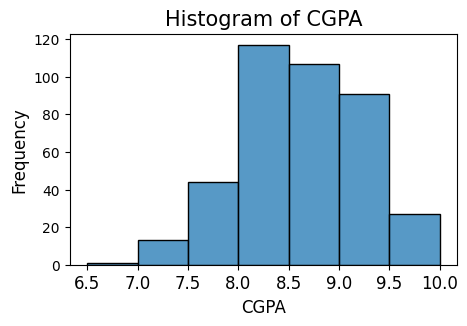

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(df['CGPA'], bins=[6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])
plt.xticks(rotation=0, fontsize=12)
plt.title('Histogram of CGPA', fontsize=15)
plt.xlabel('CGPA', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

The scatterplot below gives us the undergraduate CGPA vs the chance of admission into a graduate program. This is also important to look at as we would think that a higher CGPA in the undergraduate university would increase the chances of getting an admission into a graduate university.

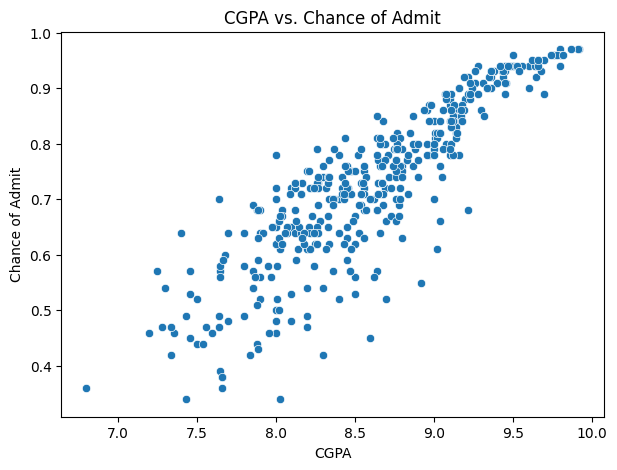

In [ ]:
#Scatterplot between CGPA and Chance of Admit - we got correlation from heatmap as 0.88
plt.figure(figsize=(7, 5))
sns.scatterplot(x='CGPA', y='Chance of Admit ', data=df)
plt.title('CGPA vs. Chance of Admit')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.show()

# Modeling and Evaluation

In this section, we develop predictive models to estimate a student's likelihood of admission based on various academic and profile features. The primary objective is to identify which factors most significantly influence admission decisions and to build models that can accurately predict outcomes for new applicants. \
Predictive modeling in university admissions allows for data-driven decision-making, potentially enhancing fairness and efficiency in the selection process. By understanding the weight of each feature, institutions can refine their criteria, and applicants can better gauge their admission prospects.

This code prepares your dataset for training multiple regression models by:

- Loading and cleaning the data

- Splitting it into training/testing sets - We use the 80/20 split

- Setting up containers to hold your model results

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (after uploading)
df = pd.read_csv('adm_data.csv')

# Drop the 'Serial No.' column if it exists
if 'Serial No.' in df.columns:
    df.drop('Serial No.', axis=1, inplace=True)

print("Dataset loaded with shape:", df.shape)
print("Columns:", df.columns.tolist())

# Define features and target variable
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Create empty lists to store results
models = []
model_names = []
mse_scores = []
r2_scores = []


Dataset loaded with shape: (400, 8)
Columns: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']
Training set shape: (320, 7)
Testing set shape: (80, 7)


This code trains a linear regression model, evaluates it, and shows you:

- How well it predicts the target (MSE, R²)

- Which features matter the most (via coefficients)



--- Linear Regression ---
Mean Squared Error: 0.0046
R² Score: 0.8212

Feature Importance (Linear Regression):
             Feature  Coefficient
5               CGPA     0.114669
6           Research     0.022227
4               LOR      0.015770
2  University Rating     0.007377
1        TOEFL Score     0.002724
0          GRE Score     0.001863
3                SOP    -0.000293


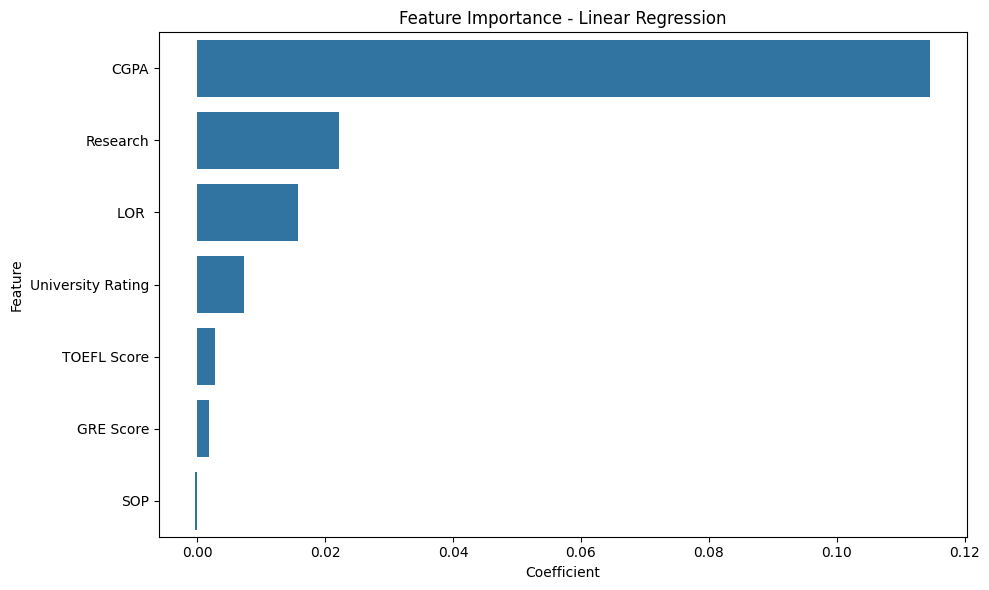

In [ ]:
# 1. Linear Regression
print("\n--- Linear Regression ---")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error: {mse_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")

# Store results
models.append(lr_model)
model_names.append("Linear Regression")
mse_scores.append(mse_lr)
r2_scores.append(r2_lr)

# Feature importance for linear regression
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance (Linear Regression):")
print(coef_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance - Linear Regression')
plt.tight_layout()
plt.show()

This code trains a Random Forest model, evaluates its performance, stores the results, and visualizes which input features had the most influence.


--- Random Forest Regression ---
Mean Squared Error: 0.0050
R² Score: 0.8066

Feature Importance (Random Forest):
             Feature  Importance
5               CGPA    0.727100
0          GRE Score    0.140231
1        TOEFL Score    0.040532
3                SOP    0.040245
4               LOR     0.022423
2  University Rating    0.015418
6           Research    0.014051


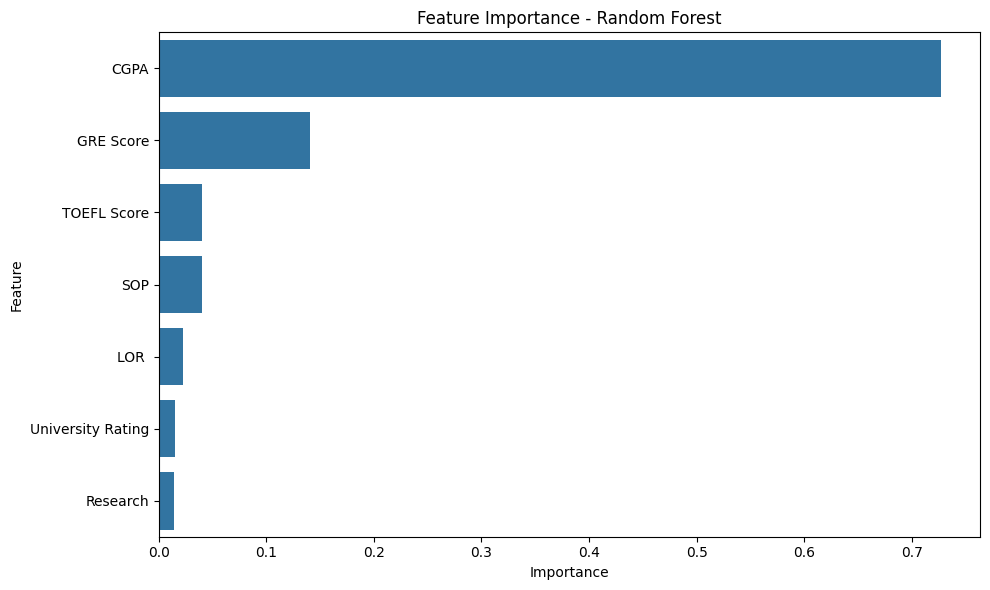

In [ ]:
# 2. Random Forest Regression
print("\n--- Random Forest Regression ---")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")

# Store results
models.append(rf_model)
model_names.append("Random Forest")
mse_scores.append(mse_rf)
r2_scores.append(r2_rf)

# Feature importance for random forest
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(rf_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

This code trains a Gradient Boosting Regression model, evaluates its accuracy, stores its results, and shows which features mattered most.


--- Gradient Boosting Regression ---
Mean Squared Error: 0.0053
R² Score: 0.7955

Feature Importance (Gradient Boosting):
             Feature  Importance
5               CGPA    0.589841
0          GRE Score    0.320593
3                SOP    0.033623
1        TOEFL Score    0.019551
4               LOR     0.013392
2  University Rating    0.012555
6           Research    0.010445


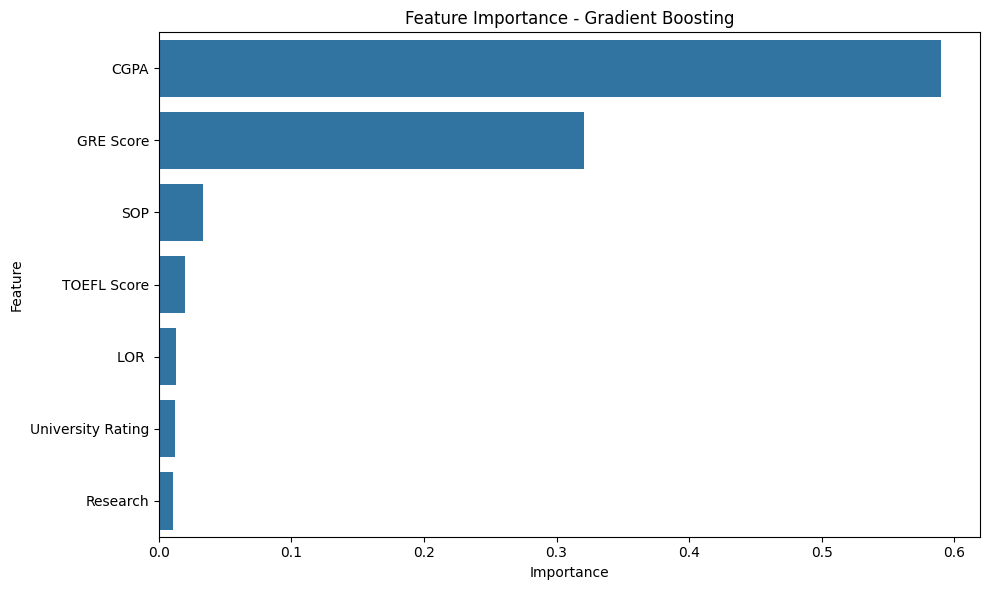

In [ ]:
# 3. Gradient Boosting Regression
print("\n--- Gradient Boosting Regression ---")
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Mean Squared Error: {mse_gb:.4f}")
print(f"R² Score: {r2_gb:.4f}")

# Store results
models.append(gb_model)
model_names.append("Gradient Boosting")
mse_scores.append(mse_gb)
r2_scores.append(r2_gb)

# Feature importance for gradient boosting
gb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance (Gradient Boosting):")
print(gb_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_importance)
plt.title('Feature Importance - Gradient Boosting')
plt.tight_layout()
plt.show()

This section compares how well each model performed by showing:

- MSE (lower is better): Measures prediction error

- R² (higher is better): Measures how well the model explains the variation in the data

The script also sets up a second subplot


--- Model Comparison ---
               Model       MSE        R²
0  Linear Regression  0.004617  0.821208
1      Random Forest  0.004994  0.806608
2  Gradient Boosting  0.005281  0.795502
3  Gradient Boosting  0.005281  0.795502


([0, 1, 2],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'Gradient Boosting')])

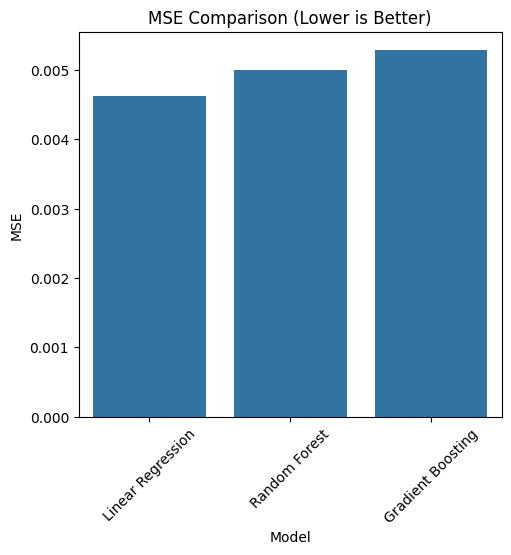

In [ ]:
# Model Comparison
results_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_scores,
    'R²': r2_scores
})

print("\n--- Model Comparison ---")
print(results_df)

plt.figure(figsize=(12, 5))

# MSE Comparison
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('MSE Comparison (Lower is Better)')
plt.xticks(rotation=45)

This code:

- Finishes the side-by-side comparison of model performance.

- Displays both MSE and R² plots.

- Identifies and prints the model with the best R² score, which tells you which model best explains the variance in the data.

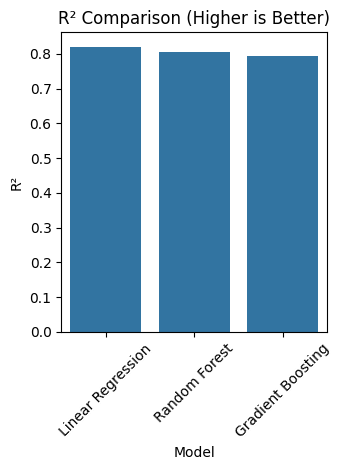


Best model based on R² score: Linear Regression


In [ ]:
# R² Comparison
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R²', data=results_df)
plt.title('R² Comparison (Higher is Better)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Find the best model based on R²
best_model_index = np.argmax(r2_scores)
best_model = models[best_model_index]
best_model_name = model_names[best_model_index]

print(f"\nBest model based on R² score: {best_model_name}")

This visualization helps you diagnose prediction accuracy:

- If points cluster near the diagonal red line → good predictions.

- If points are scattered far from it → more error.

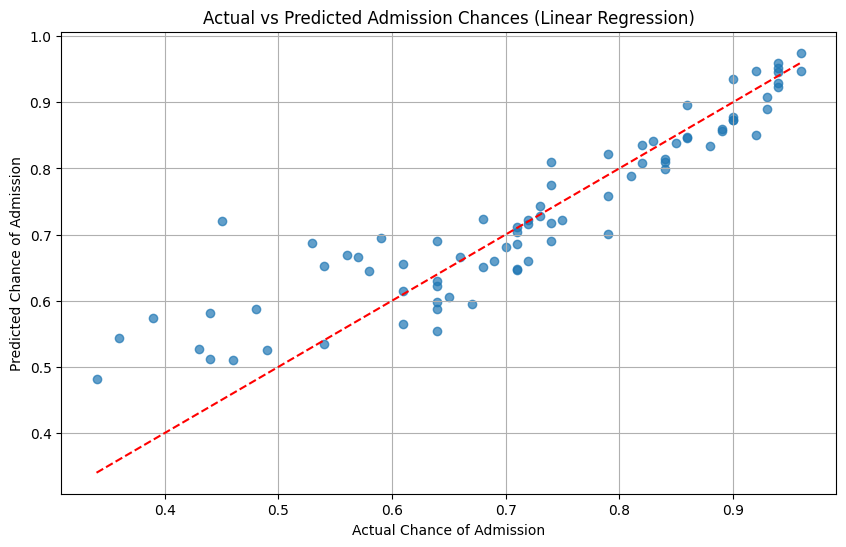

In [ ]:
# Visualize actual vs predicted values for the best model
if best_model_index == 0:
    y_pred_best = y_pred_lr
elif best_model_index == 1:
    y_pred_best = y_pred_rf
else:
    y_pred_best = y_pred_gb

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predicted Chance of Admission')
plt.title(f'Actual vs Predicted Admission Chances ({best_model_name})')
plt.grid(True)
plt.show()

# Conclusions and Future Directions

The analysis revealed that certain features, notably CGPA and GRE scores, have a strong positive correlation with admission chances. The multiple linear regression model provided a clear understanding of these relationships, while ensemble methods like random forests offered improved predictive accuracy by capturing complex interactions between variables.

Key findings include:

CGPA: A higher undergraduate GPA consistently increases the likelihood of admission.

GRE Scores: Strong GRE scores positively influence admission chances, though their impact varies across different university ratings.

Research Experience: Applicants with research experience have a higher probability of admission, highlighting the value placed on research exposure.

These insights align with existing literature emphasizing the importance of academic performance and research experience in graduate admissions.

To build upon this study, future research could consider:

1. Incorporating Non-Academic Factors: Include qualitative data such as personal statements, letters of recommendation, and extracurricular activities to capture a holistic view of the applicant.

2. Advanced Modeling Techniques: Utilize deep learning models or natural language processing (NLP) to analyze textual data from essays and recommendations, as explored in recent studies .

3. Bias and Fairness Analysis: Investigate potential biases in the models concerning gender, race, or socioeconomic status, ensuring equitable admission predictions .

4. Longitudinal Studies: Track admitted students' performance over time to validate the predictive models and adjust them based on real-world outcomes.

By addressing these areas, future models can provide more comprehensive and fair assessments, aiding both institutions and applicants in the admissions process.